In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv("card_transdata.csv")

# Over sample

In [4]:
x = df.drop('fraud', axis = 1)
y = df[['fraud']]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 1)

In [93]:
# Resampling
os = SMOTE(random_state= 1)
x_train, y_train = os.fit_resample(x_train, y_train)

In [107]:
x_train.shape

(1369040, 7)

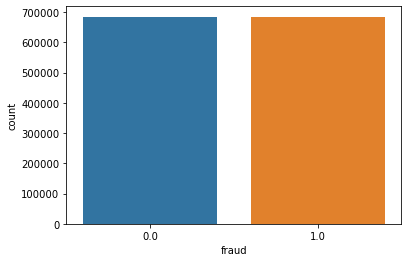

In [94]:
sns.countplot(data = x_train.join(y_train), x = 'fraud')
plt.show()

In [95]:
# Normalization
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [96]:
# Training the model
lr = LogisticRegression(random_state = 1)
lr.fit(x_train, y_train.ravel())

LogisticRegression()

In [98]:
x_test.shape

(250000, 7)

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.96    228077
         1.0       0.54      0.92      0.68     21923

    accuracy                           0.92    250000
   macro avg       0.77      0.92      0.82    250000
weighted avg       0.95      0.92      0.93    250000



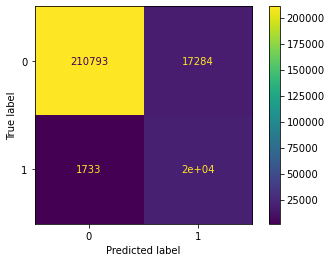

In [97]:
print(classification_report(y_test, lr.predict(x_test)))
ConfusionMatrixDisplay(confusion_matrix(y_test, lr.predict(x_test))).plot()
plt.show()

# Under sample

In [99]:
x2 = df.drop('fraud', axis = 1)
y2 = df[['fraud']]

In [100]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, random_state= 1)

In [106]:
x_train2.shape

(130960, 7)

In [101]:
us = RandomUnderSampler(random_state = 1)
x_train2, y_train2 = us.fit_resample(x_train2, y_train2)

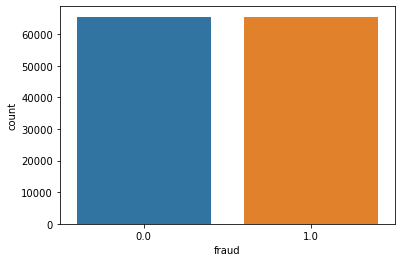

In [102]:
sns.countplot(data = x_train2.join(y_train2), x = 'fraud')
plt.show()

In [103]:
# Normalization
scaler = MinMaxScaler()
x_train2 = scaler.fit_transform(x_train2)
x_test2 = scaler.transform(x_test2)

y_train2 = scaler.fit_transform(y_train2)
y_test2 = scaler.transform(y_test2)

In [104]:
# Training the model
lr2 = LogisticRegression(max_iter= 2000)
lr2.fit(x_train2, np.array(y_train2).ravel())

LogisticRegression(max_iter=2000)

              precision    recall  f1-score   support

         0.0       0.99      0.91      0.95    228077
         1.0       0.49      0.93      0.64     21923

    accuracy                           0.91    250000
   macro avg       0.74      0.92      0.79    250000
weighted avg       0.95      0.91      0.92    250000



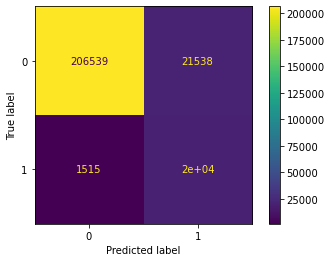

In [105]:
print(classification_report(y_test2, lr2.predict(x_test2)))
ConfusionMatrixDisplay(confusion_matrix(y_test2, lr2.predict(x_test2))).plot()
plt.show()

# Over and under sampling

In [110]:
x3 = df.drop('fraud', axis = 1)
y3 = df[['fraud']]

In [111]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, random_state= 1)

In [112]:
x_train3.shape

(750000, 7)

In [113]:
ou = SMOTEENN(random_state = 1)
x_train3, y_train3 = ou.fit_resample(x_train3, y_train3)

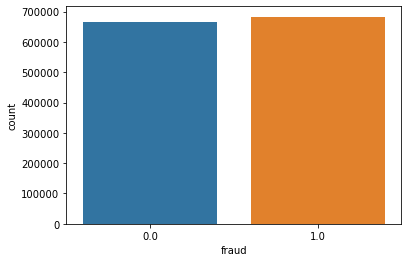

In [114]:
sns.countplot(data = x_train3.join(y_train3), x = 'fraud')
plt.show()

In [115]:
# Normalization
scaler = MinMaxScaler()
x_train3 = scaler.fit_transform(x_train3)
x_test3 = scaler.transform(x_test3)

y_train3 = scaler.fit_transform(y_train3)
y_test3 = scaler.transform(y_test3)

In [116]:
# Training the model
lr3 = LogisticRegression(max_iter= 2000)
lr3.fit(x_train3, np.array(y_train3).ravel())

LogisticRegression(max_iter=2000)

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.96    228077
         1.0       0.54      0.94      0.68     21923

    accuracy                           0.92    250000
   macro avg       0.77      0.93      0.82    250000
weighted avg       0.95      0.92      0.93    250000



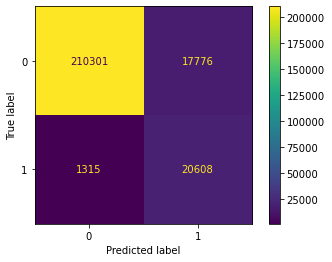

In [117]:
print(classification_report(y_test3, lr3.predict(x_test3)))
ConfusionMatrixDisplay(confusion_matrix(y_test3, lr3.predict(x_test3))).plot()
plt.show()

In [ ]:
# Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

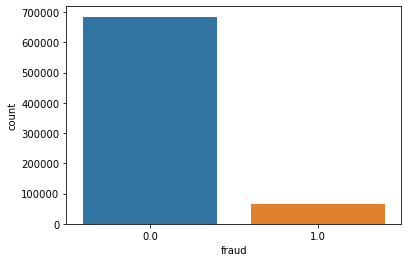

In [6]:
sns.countplot(data = x_train.join(y_train), x = 'fraud')
plt.show()

In [7]:
ou = SMOTEENN(random_state = 1)
x_train, y_train = ou.fit_resample(x_train, y_train)

In [16]:
x_train.shape, y_train.shape

((1348633, 7), (1348633, 1))

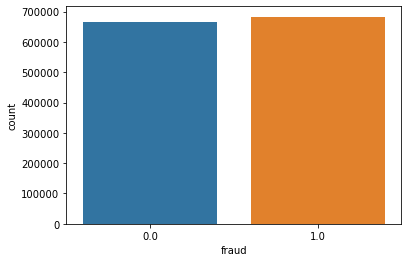

In [8]:
sns.countplot(data = x_train.join(y_train), x = 'fraud')
plt.show()

In [12]:
rf = RandomForestClassifier(criterion = 'entropy' ,random_state = 1)
rf.fit(x_train, np.array(y_train).ravel())
rf_pred = rf.predict(x_test)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    665680
         1.0       1.00      1.00      1.00    682953

    accuracy                           1.00   1348633
   macro avg       1.00      1.00      1.00   1348633
weighted avg       1.00      1.00      1.00   1348633



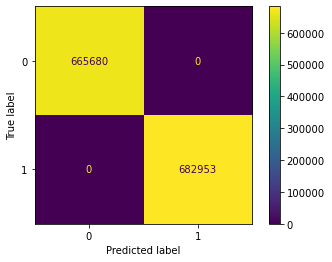

In [14]:
# TREINO
print(classification_report(y_train, rf.predict(x_train)))
ConfusionMatrixDisplay(confusion_matrix(y_train, rf.predict(x_train))).plot()
plt.show()

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    228077
         1.0       1.00      1.00      1.00     21923

    accuracy                           1.00    250000
   macro avg       1.00      1.00      1.00    250000
weighted avg       1.00      1.00      1.00    250000



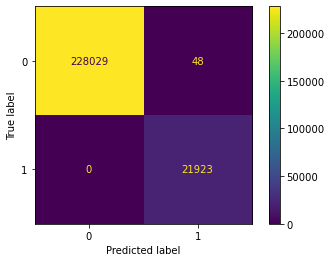

In [15]:
# TESTE
print(classification_report(y_test, rf_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, rf_pred)).plot()
plt.show()

In [18]:
pip install pipreqs

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: requests in c:\users\lucas\anaconda3\lib\site-packages (from yarg->pipreqs) (2.24.0)

  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13709 sha256=96fe1aefd7f1b184ee061af61f7eb9dbdbd1784b7bb59b2b3662feea3d845feb
  Stored in directory: c:\users\lucas\appdata\local\pip\cache\wheels\56\ea\58\ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built docopt
